# SPACESHIP TITANIC  

https://www.kaggle.com/competitions/spaceship-titanic/overview  
  
REFERRED NOTEBOOOKS:  
    https://www.kaggle.com/code/lazer999/spaceship-titanic-top-6-for-beginners  

## 1. IMPORTING LIBRARIES AND DATA

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', font_scale = 1.2)
import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#xgboost
from xgboost import XGBClassifier as xgb


In [190]:
df_train = pd.read_csv('/Users/abhin/Desktop/Uni/VSC/Spaceship Titanic/Data/train.csv')
df_test = pd.read_csv('/Users/abhin/Desktop/Uni/VSC/Spaceship Titanic/Data/test.csv')


## 2. DATA EXPLORATION  

In [191]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [192]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [193]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

**BRIEFING**  
  
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.  
People in a group are often family members, but not always.  
*Might check if the people in the same group have a higher chance of being transported*  

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.  
Passengers in cryosleep are confined to their cabins.  

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
*Might have to group passengers in P and S and check the transportation rate*   

**Destination** - The planet the passenger will be debarking to.  

**Age** - The age of the passenger.  

**VIP** - Whether the passenger has paid for special VIP service during the voyage.  

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
*Turns out to influence the target variable more than you think*

**Name** - The first and last names of the passenger.  

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  
  
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.  


In [194]:
df_train.shape

(8693, 14)

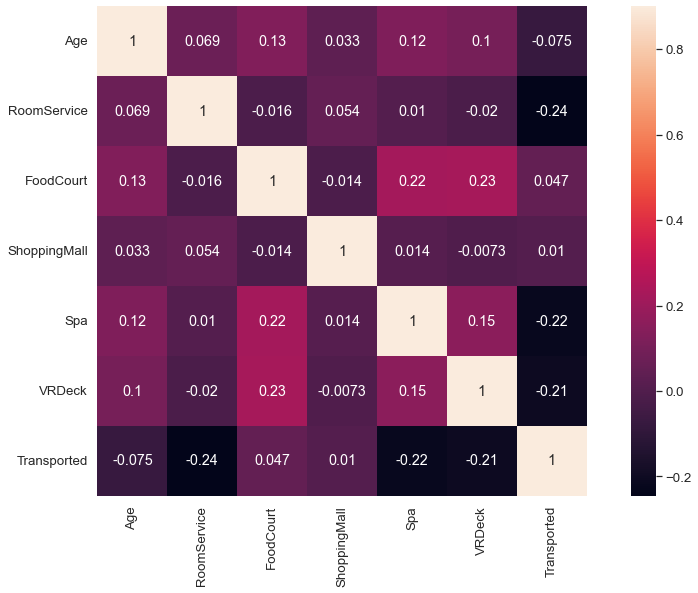

In [195]:
corrmat = df_train.corr()
plt.subplots(figsize=(16,9))
sns.heatmap(corrmat, annot=True, vmax=0.9, square= True)
plt.show()

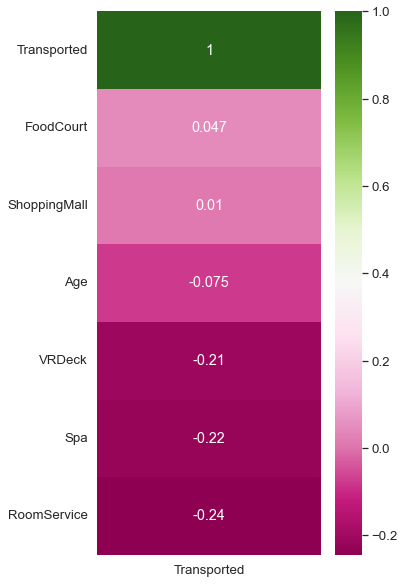

In [196]:
corrmat_new = df_train.corr()
plt.figure(figsize=(5,10))
sns.heatmap(corrmat_new[['Transported']].sort_values(by=['Transported'],ascending=False),annot=True,cmap ='PiYG' )
plt.yticks(rotation=0)
plt.show()

Interestingly, theres a negative correlation in people paying for luxuries and being transported to the other dimension, i.e., people who paid less for these amenities had a higher chance of being transported.  

FoodCourt and ShoppingMall, however has an almost negligible influence on transportation  
Age has a slight negative correlation; younger passengers have a slightly higher chance to be transported)  

Reminder that the above correlation matrix only consists of numerical values, and many categorical features that affect the target variable are not included in the heatmap

In [197]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [198]:
df_train.describe(include = ['O']) #pretty cool (remember include=['O'], not '0')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


There are 6000+ cabin values, might have to group them according to side(p or s) OR drop entirely

In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Total 8693 values; There are some missing values for each feature

### HomePlanet

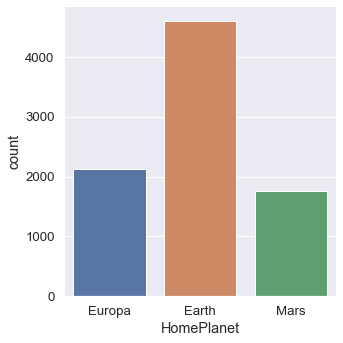

In [200]:
sns.catplot(x='HomePlanet',kind='count',data=df_train)
plt.show()

In [201]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [202]:
HomePlanet_transported = df_train.groupby('HomePlanet').Transported.value_counts()
HomePlanet_transported

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: Transported, dtype: int64

In [203]:
HomePlanet_transported_avg = round(df_train[['HomePlanet','Transported']].groupby(['HomePlanet'],as_index=False).mean(),3)
HomePlanet_transported_avg.set_index('HomePlanet',inplace=True)
HomePlanet_transported_avg

,Transported
HomePlanet,
Earth,0.424
Europa,0.659
Mars,0.523


In [204]:
# homepl = HomePlanet_transported_avg.plot(kind = 'bar')
# plt.xticks(rotation=0)
# plt.show()

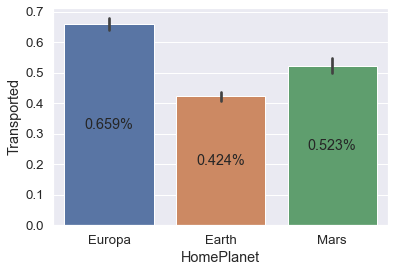

In [205]:
ax = sns.barplot(df_train['HomePlanet'],df_train['Transported'])
plt.bar_label(ax.containers[0],label_type= 'center',fmt='%.3f%%')
plt.show()

1. Most passengers are from Earth
2. Less than half of the passengers from earth got transported
3. A majority of the passengers from Europa got transported
4. Almost half of the passengers from Mars got transported

*Later on u can check HomePlanet vs Luxury usage, cryoSleep(done), cabin, destination etc* 

### CRYOSLEEP

In [206]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

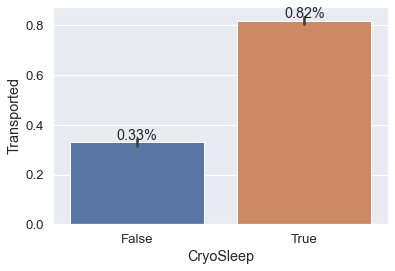

In [207]:
ax = sns.barplot(df_train['CryoSleep'],df_train['Transported'])
plt.bar_label(ax.containers[0], fmt = '%.2f%%')
plt.show()

A strong correlaion between those who got transported and those who were in CryoSleep. Almost guaranteed to get transported.  
*Maybe something to do with CryoSleep Tanks*

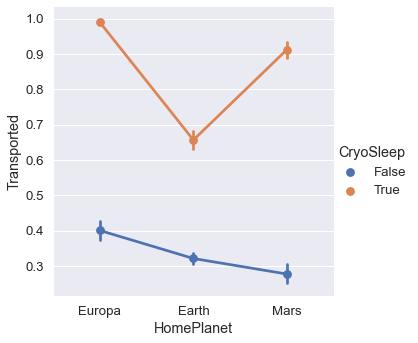

In [208]:
sns.factorplot('HomePlanet','Transported',hue='CryoSleep',data=df_train)

In [209]:
#Those from Europa and were in cryosleep who didnt get transported
df_train[(df_train['HomePlanet']=='Europa') & (df_train['CryoSleep']==True) & (df_train['Transported']==False)].shape[0]

10

Only 10 passengers from Europa who were in cryoSleep didnt get transported  
**Nearly all passengers from Europa who were in CryoSleep got transported**

### CABIN

In [210]:
df_train['CabinDeck'] = df_train['Cabin'].str[0]
df_train['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [211]:
df_test['CabinDeck'] = df_test['Cabin'].str[0]

DECKS = A,B,C,D,E,F,G,T

In [212]:
decks_transported = df_train.groupby('CabinDeck').Transported.value_counts()
decks_transported

CabinDeck  Transported
A          False           129
           True            127
B          True            572
           False           207
C          True            508
           False           239
D          False           271
           True            207
E          False           563
           True            313
F          False          1565
           True           1229
G          True           1321
           False          1238
T          False             4
           True              1
Name: Transported, dtype: int64

In [213]:
decks_transported = df_train[['CabinDeck','Transported']].groupby(['CabinDeck'],as_index=False).mean()
decks_transported.set_index('CabinDeck',inplace=True)
decks_transported

,Transported
CabinDeck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000


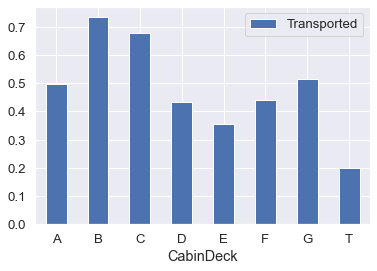

In [214]:
decks_transported.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [215]:
df_train['CabinSide'] = df_train['Cabin'].str[-1]
df_train['CabinSide'].value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

In [216]:
df_test['CabinSide'] = df_test['Cabin'].str[-1]

In [217]:
side_transported = df_train.groupby('CabinSide').Transported.value_counts()
side_transported

CabinSide  Transported
P          False          2308
           True           1898
S          True           2380
           False          1908
Name: Transported, dtype: int64

In [218]:
side_transported = df_train[['CabinSide','Transported']].groupby(['CabinSide'],as_index=False).mean()
side_transported.set_index('CabinSide',inplace=True)
side_transported

,Transported
CabinSide,
P,0.451260
S,0.555037


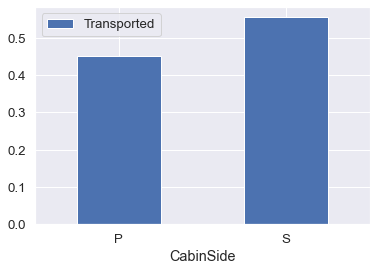

In [219]:
side_transported.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

*Pretty much 50/50. Don't think it will affect the score much. Will check if score imporves*

UPDATE: Improved KaggleScore by 0.02%

### HomePlanet vs CabinDeck

## FEATURE ENGINEERING

In [220]:
#combining train and test to simplify feature selection
train_test_data = [df_train,df_test]
train_test_data

[     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...       ...       ...            ...   ...    ...   
 8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  Shoppin

In [221]:
for dataset in train_test_data:
    dataset[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = dataset[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['VIP'] = dataset['VIP'].fillna(False)
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Mars')
    dataset['Destination'] = dataset['Destination'].fillna('PSO J318.5-22')
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
    dataset['CabinDeck'] = dataset['CabinDeck'].fillna('T')
    dataset['CabinSide'] = dataset['CabinSide'].fillna('S')

In [222]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
CabinDeck         0
CabinSide         0
dtype: int64

In [223]:
df_test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
CabinDeck         0
CabinSide         0
dtype: int64

In [224]:
for dataset in train_test_data:
    dataset['TotalSpent'] = dataset['RoomService']+dataset['FoodCourt']+dataset['ShoppingMall']+dataset['Spa']+dataset['VRDeck']

In [225]:
for dataset in train_test_data:
    dataset['AgeGroup'] = 0
    for i in range(4):
        dataset.loc[(dataset.Age >= 10*i) & (dataset.Age < 10*(i+1)),'AgeGroup'] = i

In [226]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide,TotalSpent,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0.0,3
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,736.0,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,10383.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,5176.0,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1091.0,1


In [227]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinSide,TotalSpent,AgeGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S,0.0,2
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S,2832.0,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S,0.0,3
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S,7418.0,3
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S,645.0,2


In [228]:
# for dataset in train_test_data:
#     dataset['HomePlanet'] = dataset['HomePlanet'].map({'Europa':0,'Earth':1,'Mars':2}).astype(int, errors= 'ignore')
#     dataset['CryoSleep'] = dataset['CryoSleep'].map({False:0,True:1}).astype(int,errors='ignore')
    

In [229]:
# CONVERT CATEGORICAL INTO NUMERICAL LABELS            >love this
categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','CabinDeck','CabinSide']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
CabinDeck
CabinSide


In [230]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide,TotalSpent,AgeGroup
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0.0,3
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,1,736.0,2
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,10383.0,0
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,5176.0,3
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1091.0,1


In [231]:
df_train = df_train.drop(['Name','Cabin','Age'],axis=1)

In [232]:
df_test = df_test.drop(['Name','Cabin','Age'],axis=1)

In [233]:
df_train['Transported'] = df_train['Transported'].replace({True:1,False:0})

In [234]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,TotalSpent,AgeGroup
0,0001_01,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0,3
1,0002_01,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,5,1,736.0,2
2,0003_01,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,10383.0,0
3,0003_02,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,5176.0,3
4,0004_01,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1091.0,1


In [235]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,TotalSpent,AgeGroup
0,0013_01,0,1,2,0,0.0,0.0,0.0,0.0,0.0,6,1,0.0,2
1,0018_01,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,5,1,2832.0,1
2,0019_01,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2,1,0.0,3
3,0021_01,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,2,1,7418.0,3
4,0023_01,0,0,2,0,10.0,0.0,635.0,0.0,0.0,5,1,645.0,2


## MODEL 

In [236]:
X=df_train.drop(columns=['PassengerId','Transported'],axis=1)
y=df_train['Transported']

In [237]:
def train(model, X, y):
    #training the model
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.25)
    model.fit(X_train,y_train)

    #predicting
    pred = model.predict(X_test)

    #cross validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test,pred))
    print('CV Score', cv_score)


Model Report
MSE: 0.20837166513339467
CV Score 0.2046446809172368


<AxesSubplot:title={'center':'Feature Importance'}>

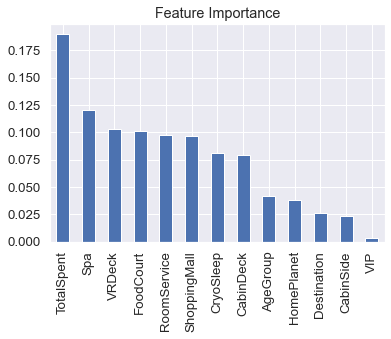

In [238]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
train(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

## SUBMISSION

In [239]:
test = df_test.drop('PassengerId',axis=1).copy()

In [240]:
y_pred = model.predict(test)

In [241]:
submission = pd.DataFrame({
        "PassengerId": df_test['PassengerId'],
        "Transported": y_pred.astype(bool)
})

submission.to_csv('RFSubmission.csv',index=False)

In [242]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
